In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans

from sklearn import preprocessing

## Question_1

In [2]:
df = pd.read_csv('1_HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,Yes
1,0.80,0.86,5,262,6,0,0,sales,medium,Yes
2,0.11,0.88,7,272,4,0,0,sales,medium,Yes
3,0.72,0.87,5,223,5,0,0,sales,low,Yes
4,0.37,0.52,2,159,3,0,0,sales,low,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   Departments            14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 1.1+ MB


In [4]:
## There are no NULL values in the data-set
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
Departments              0
salary                   0
left                     0
dtype: int64

In [5]:
print("Departments column : ",np.unique(df['Departments ']))
print("\nSalary column        : ",np.unique(df['salary']))

Departments column :  ['IT' 'RandD' 'accounting' 'hr' 'management' 'marketing' 'product_mng'
 'sales' 'support' 'technical']

Salary column        :  ['high' 'low' 'medium']


In [6]:
salary_var = dict(df['left'].value_counts())
salary_var

{'No': 11428, 'Yes': 3571}

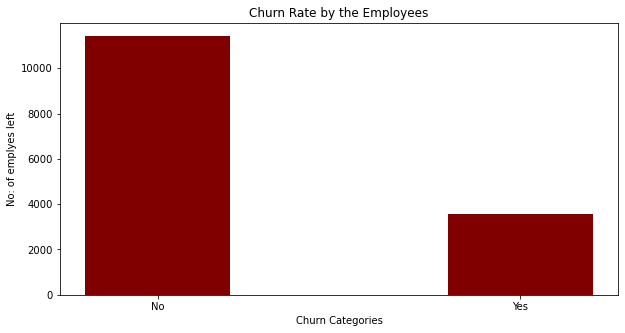

In [7]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
left_level = list(salary_var.keys())
left_count = list(salary_var.values())

plt.bar(left_level, left_count, color ='maroon',width = 0.4)
 
plt.xlabel("Churn Categories")
plt.ylabel("No: of emplyes left")
plt.title("Churn Rate by the Employees")
plt.show()

In [8]:
#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
df['salary']            = le.fit_transform(df['salary'])
df['Departments ']= le.fit_transform(df['Departments '])

In [9]:
print("Departments column : ",np.unique(df['Departments ']))
print("\nSalary column           : ",np.unique(df['salary']))

Departments column :  [0 1 2 3 4 5 6 7 8 9]

Salary column           :  [0 1 2]


In [10]:
x = df.iloc[:,:-1]  ## in-dependent feature
y = df.iloc[:,-1]   ## dependent feature (left feature)

In [11]:
number_of_clusters = 3
kmeans = KMeans(number_of_clusters)
kmeans.fit(x)

KMeans(n_clusters=3)

In [12]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 1, 1, ..., 2, 1, 2], dtype=int32)

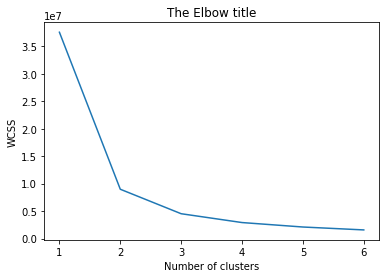

In [13]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.show()

## Question-3

In [14]:
df3 = pd.read_excel('3_Wholesale customers data.xls')
df3.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [15]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [16]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
Departments              0
salary                   0
left                     0
dtype: int64

In [17]:
print("Number of attributes : ",len(list(df3.columns)))
print("Number of records : ",len(df3))

Number of attributes :  8
Number of records :  440


In [18]:
from sklearn.cluster import DBSCAN
db_scan = DBSCAN(eps=1.0, min_samples=4)

In [19]:
db_scan.fit(x)

DBSCAN(eps=1.0, min_samples=4)

In [20]:
left = df[df['left'] == 'Yes']
not_left = df[df['left'] == 'No']

In [21]:
len(left['satisfaction_level'])
len(not_left['satisfaction_level'])

11428

In [22]:
for i in df.columns:
    print("\nFeature  : {}".format(i))
    print("Left        : ", len(left[i]),end = '')
    print("    Not Left : ",len(not_left[i]))


Feature  : satisfaction_level
Left        :  3571    Not Left :  11428

Feature  : last_evaluation
Left        :  3571    Not Left :  11428

Feature  : number_project
Left        :  3571    Not Left :  11428

Feature  : average_montly_hours
Left        :  3571    Not Left :  11428

Feature  : time_spend_company
Left        :  3571    Not Left :  11428

Feature  : Work_accident
Left        :  3571    Not Left :  11428

Feature  : promotion_last_5years
Left        :  3571    Not Left :  11428

Feature  : Departments 
Left        :  3571    Not Left :  11428

Feature  : salary
Left        :  3571    Not Left :  11428

Feature  : left
Left        :  3571    Not Left :  11428


## Question-4

In [23]:
df4 = pd.read_csv('AdultUCI.csv')
df4.head()

/Users/prashanthsingaravelan/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,small
1,2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,small
2,3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,small
3,4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,small
4,5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,small
